In [35]:
import numpy as np
from matplotlib.pyplot import semilogy


def polyinterp(t, y):

    n = len(t) - 1
    C = (t[-1] - t[0]) / 4  # scaling factor to ensure stability
    tc = t / C

    # Adding one node at a time, compute inverses of the weights.
    omega = np.ones(n + 1)
    for m in range(n):
        d = tc[: m + 1] - tc[m + 1]  # vector of node differences
        omega[: m + 1] = omega[: m + 1] * d  # update previous
        omega[m + 1] = np.prod(-d)  # compute the new one
    w = 1 / omega  # go from inverses to weights

    def p(x):
        # Compute interpolant.
        z = np.where(x == t)[0]
        if len(z) > 0:  # avoid dividing by zero
            # Apply L'Hopital's Rule exactly.
            f = y[z[0]]
        else:
            terms = w / (x - t)
            f = np.sum(y * terms) / np.sum(terms)
        return f

    return np.vectorize(p)

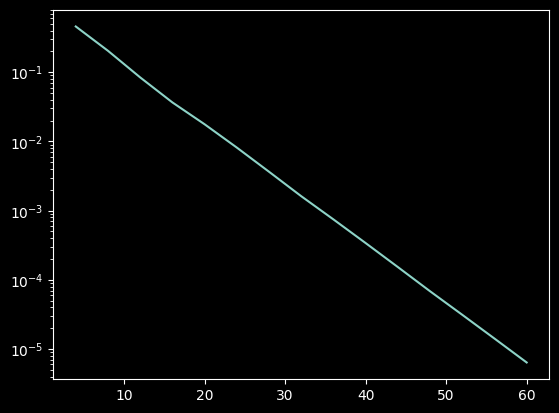

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def polyinterp(t, y):

    n = len(t) - 1
    C = (t[-1] - t[0]) / 4  # scaling factor to ensure stability
    tc = t / C

    # Adding one node at a time, compute inverses of the weights.
    omega = np.ones(n + 1)
    for m in range(n):
        d = tc[: m + 1] - tc[m + 1]  # vector of node differences
        omega[: m + 1] = omega[: m + 1] * d  # update previous
        omega[m + 1] = np.prod(-d)  # compute the new one
    w = 1 / omega  # go from inverses to weights

    def p(x):
        # Compute interpolant.
        z = np.where(x == t)[0]
        if len(z) > 0:  # avoid dividing by zero
            # Apply L'Hopital's Rule exactly.
            f = y[z[0]]
        else:
            terms = w / (x - t)
            f = np.sum(y * terms) / np.sum(terms)
        return f

    return np.vectorize(p)

f = lambda x: 1 / (25 * x**2 + 1)
n = np.arange(4, 61, 4)
err = []
for i in n:
    xx = np.linspace(-1, 1, 4001)
    theta = np.pi * np.arange(i + 1) / i
    t = -np.cos(theta)
    y = f(t)
    p = polyinterp(t, y)
    err.append(np.linalg.norm(p(xx) - f(xx), ord=np.inf))

plt.semilogy(n, err)

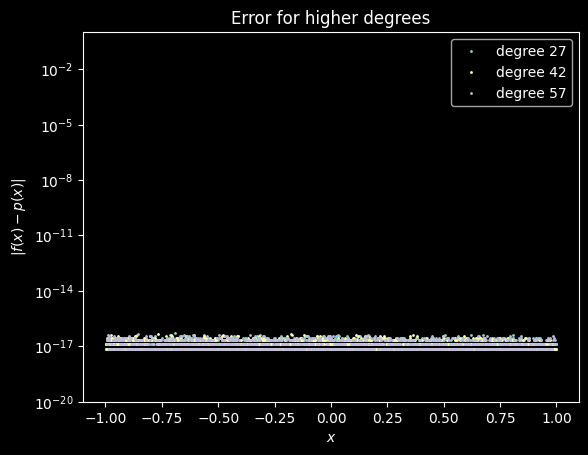

In [37]:
#9.3.3
from numpy import *
from matplotlib.pyplot import *

def chebinterp(f, n):
    theta = np.pi * np.arange(n + 1) / n
    t = -np.cos(theta)
    y = f(t)

    d = np.ones(n + 1)
    d[0], d[n] = 1/2, 1/2
    w = [(-1)**k * d[k] for k in range(n + 1)]

    def p(x):
        z = np.where(x == t)[0]
        if len(z) > 0:
            f = y[z[0]]
        else:
            terms = w / (x - t)
            f = np.sum(y * terms) / np.sum(terms)
        return f

    return np.vectorize(p)

f = lambda x: 1 / (x**2 + 16)
x = linspace(-1, 1, 1601)
N = 12 + 15 * arange(1, 4)
labels = []
for k, n in enumerate(N):
    p = chebinterp(f, n)
    err = abs(f(x) - p(x))
    semilogy(x, err, ".", markersize=2)
    labels.append(f"degree {n}")
xlabel("$x$"),  ylabel("$|f(x)-p(x)|$"),  ylim([1e-20, 1])
legend(labels),  title("Error for higher degrees");

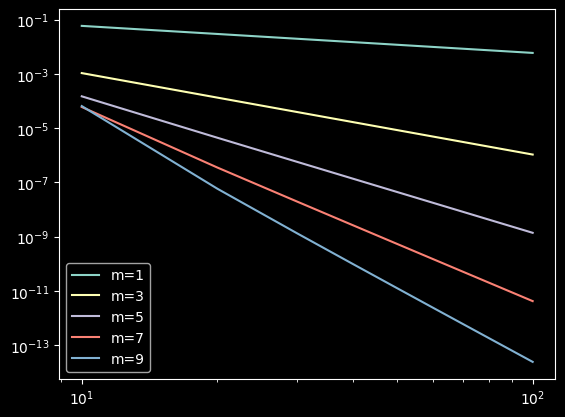

In [38]:
#9.3.4
from numpy import *
from matplotlib.pyplot import *

def chebinterp(f, n):
    theta = np.pi * np.arange(n + 1) / n
    t = -np.cos(theta)
    y = f(t)

    d = np.ones(n + 1)
    d[0], d[n] = 1/2, 1/2
    w = [(-1)**k * d[k] for k in range(n + 1)]

    def p(x):
        z = np.where(x == t)[0]
        if len(z) > 0:
            f = y[z[0]]
        else:
            terms = w / (x - t)
            f = np.sum(y * terms) / np.sum(terms)
        return f

    return np.vectorize(p)

N = arange(10, 101, 10)
M = [1, 3, 5, 7, 9]
x = linspace(-1, 1, 5001)

labels = []
for m in M:
    err = []
    f = lambda x: abs(x)**m
    for n in N:
        p = chebinterp(f, n)
        err.append(np.linalg.norm(p(x) - f(x), ord=np.inf))
    labels.append(f"m={m}")
    loglog(N, err)
    legend(labels)

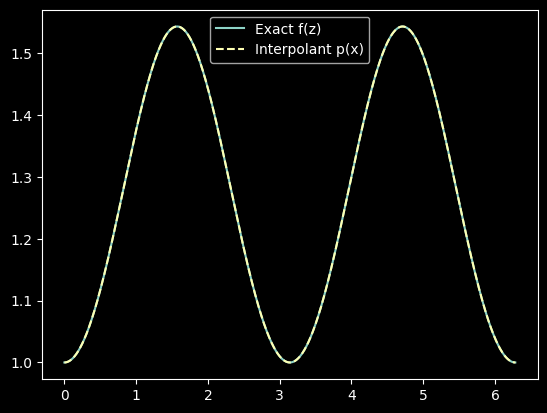

In [39]:
#9.3.5
from numpy import *
from matplotlib.pyplot import *

def chebinterp(f, n):
    theta = np.pi * np.arange(n + 1) / n
    t = -np.cos(theta)
    y = f(t)

    d = np.ones(n + 1)
    d[0], d[n] = 1/2, 1/2
    w = [(-1)**k * d[k] for k in range(n + 1)]

    def p(x):
        z = np.where(x == t)[0]
        if len(z) > 0:
            f = y[z[0]]
        else:
            terms = w / (x - t)
            f = np.sum(y * terms) / np.sum(terms)
        return f

    return np.vectorize(p)

a = 0
b = 2 * pi
f_z = lambda z: (exp(sin(z)) + exp(-sin(z))) / 2

def mapped_f(x):
    z = a + (b - a) * (x + 1) / 2
    return f_z(z)

z_plot = linspace(a, b, 5001)
x_mapped = 2 * (z_plot - a) / (b - a) - 1
n = 40
p = chebinterp(mapped_f, n)

plot(z_plot, f_z(z_plot), '-', label='Exact f(z)')
plot(z_plot, p(x_mapped), '--', label='Interpolant p(x)')
legend()





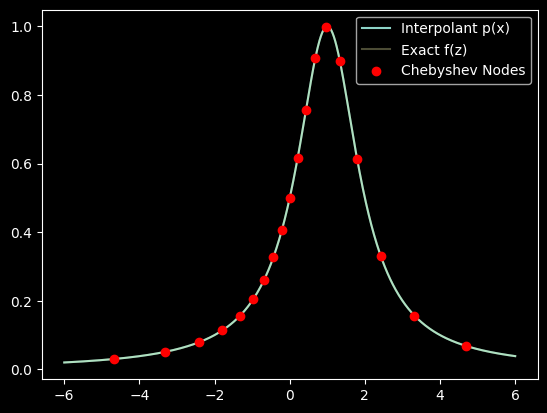

In [59]:
#9.3.5
from numpy import *
from matplotlib.pyplot import *

def chebinterp(f, n):
    theta = np.pi * np.arange(n + 1) / n
    t = -np.cos(theta)
    y = f(t)

    d = np.ones(n + 1)
    d[0], d[n] = 1/2, 1/2
    w = [(-1)**k * d[k] for k in range(n + 1)]

    def p(x):
        z = np.where(abs(x - t) < 1e-14)[0]
        if len(z) > 0:
            f = y[z[0]]
        else:
            terms = w / (x - t)
            f = np.sum(y * terms) / np.sum(terms)
        return f

    return np.vectorize(p)


f_z = lambda z: 1 / (z**2 - 2 * z + 2)

def mapped_f(x):
    #避免浮点数精度问题，使用 isclose 判定是否为边界
    is_boundary = np.isclose(np.abs(x), 1)
    #先临时把所有的1和-1替换成0以避免计算 z 时除以 0 报错
    x_safe = np.where(is_boundary, 0, x)
    #用x_safe计算 z
    z = 2 * x_safe / (1 - x_safe**2)
    #计算函数值
    val = f_z(z)
    #修正返回值：如果是边界点 (+/-1)，对应的 z 是无穷大，f(z) 极限为 0
    #如果不是边界点，返回计算出的 val
    return np.where(is_boundary, 0.0, val)

z_plot = linspace(-6.0001, 6.0001, 1001)
x_mapped = z_plot / (1 + sqrt(1 + z_plot**2))
n = 30
p = chebinterp(mapped_f, n)

plot(z_plot, p(x_mapped), label='Interpolant p(x)')
plot(z_plot, f_z(z_plot), alpha=0.3, label='Exact f(z)')
nodes = linspace(-6.001, 6.001, n)

theta_nodes = np.pi * np.arange(n + 1) / n
t_nodes = -np.cos(theta_nodes)
#将 t 映射回 z 域
#过滤掉边界点 (+/- 1)，因为它们映射到无穷大
valid_mask = np.abs(t_nodes) < 0.9999
z_nodes = 2 * t_nodes[valid_mask] / (1 - t_nodes[valid_mask]**2)
# 只显示在窗口 [-6, 6] 内的节点
window_mask = (z_nodes >= -6) & (z_nodes <= 6)

scatter(
    z_nodes[window_mask], f_z(z_nodes[window_mask]),
    color='red', label='Chebyshev Nodes', zorder=5
)

legend()